In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from tqdm import tqdm

# Define colors
chrysler_blue = "#3123D0"
mellow_blue = "#448AEB"
ripe_red = "#DC0B0B"

LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

# Collect data for all languages
language_stats = {}

for lang_key, lang_name in LANGUAGES.items():
    print(f"Doing {lang_name}...")
    # Load the post stats file
    filepath = f"data/results/{lang_key}/{lang_key}_{lang_key}_post_stats.json"
    
    try:
        with open(filepath) as handle:
            data = json.load(handle)
        
        # Count library occurrences and affected posts
        lib_to_posts = {}  # library -> set of post IDs
        
        for post in tqdm(data):
            imports = post.get('imports', [])
            post_id = post['id']
            
            for lib in imports:
                if lib not in lib_to_posts:
                    lib_to_posts[lib] = set()
                lib_to_posts[lib].add(post_id)
        
        # Calculate stats
        total_posts = len(data)
        lib_impact = {lib: len(posts) for lib, posts in lib_to_posts.items()}
        
        # Get top 10 most impactful libraries
        top_libs = sorted(lib_impact.items(), key=lambda x: x[1], reverse=True)[:10]
        
        language_stats[lang_name] = {
            'total_posts': total_posts,
            'top_libs': top_libs,
            'lib_impact': lib_impact
        }
        
    except FileNotFoundError:
        continue

Doing Python...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:01<00:00, 768066.52it/s]


Doing R...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 857123.09it/s]


Doing Javascript...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 729518.73it/s]


Doing Java...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 894491.92it/s]


Doing C++...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 179549.06it/s]


Doing PHP...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 853687.72it/s]


Doing Ruby...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 788549.49it/s]


Doing Perl...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 701826.16it/s]


Doing Rust...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 592066.86it/s]


Doing Swift...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 850900.07it/s]


Doing Objective C...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 577724.10it/s]


Doing C#...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 840282.44it/s]


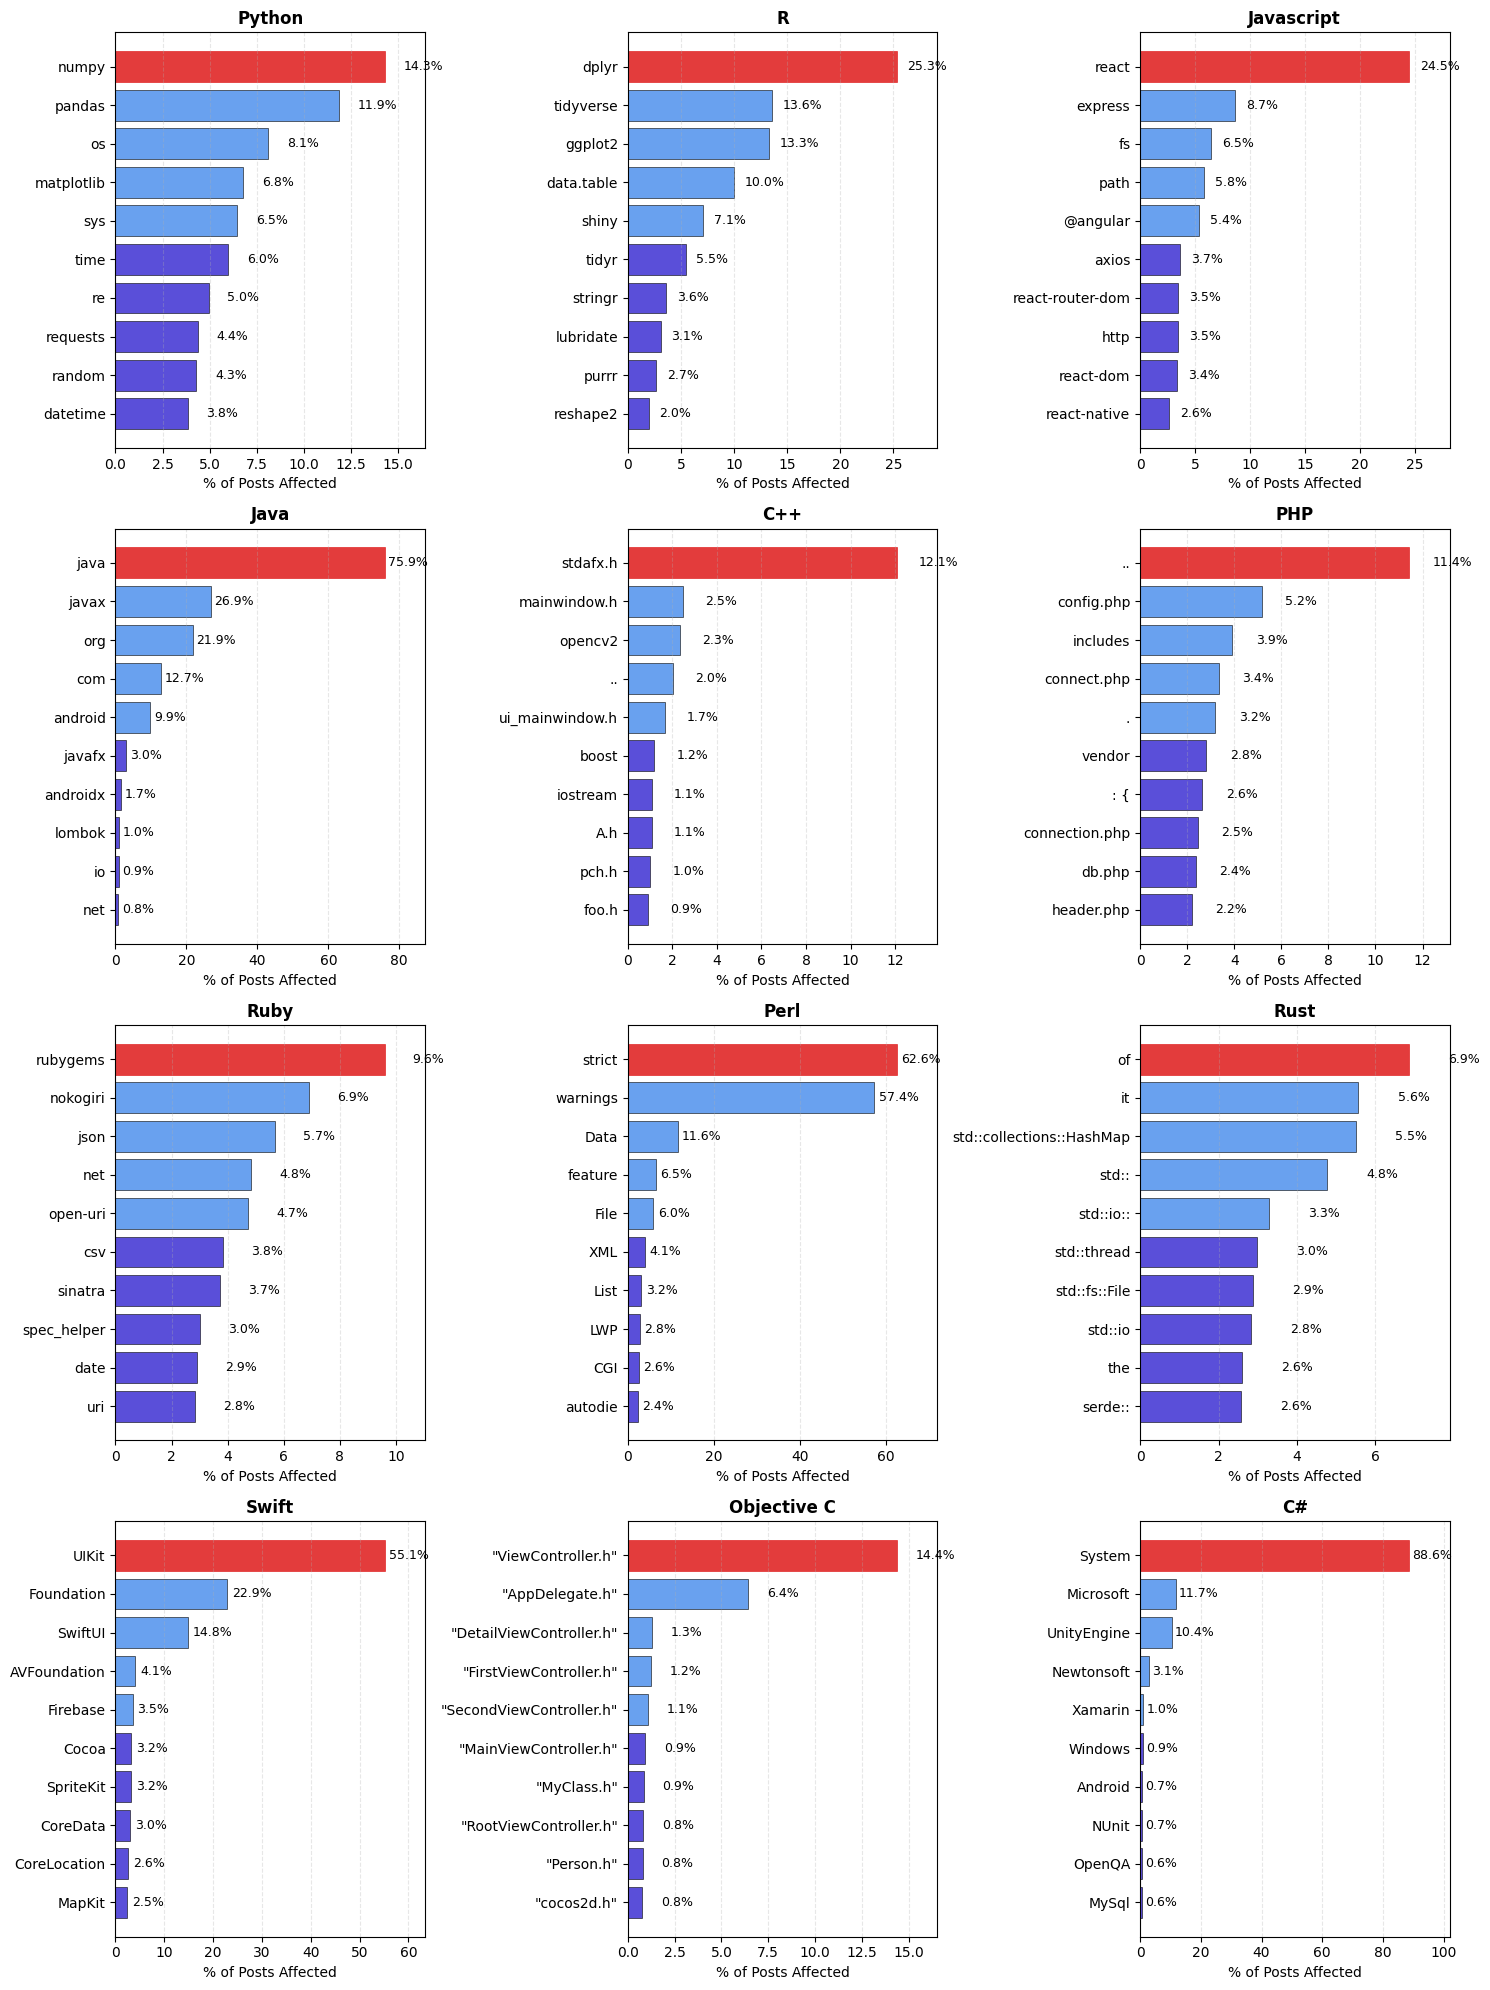

In [9]:
# Create 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for idx, (lang_name, stats) in enumerate(language_stats.items()):
    ax = axes[idx]
    
    if not stats['top_libs']:
        ax.set_visible(False)
        continue
    
    # Extract data
    libs, impacts = zip(*stats['top_libs'])
    total_posts = stats['total_posts']
    
    # Calculate percentages
    percentages = [100 * impact / total_posts for impact in impacts]
    
    # Create color gradient from mellow_blue to ripe_red
    colors = [mellow_blue if i < 5 else chrysler_blue for i in range(len(libs))]
    
    # Create horizontal bar chart
    bars = ax.barh(range(len(libs)), percentages, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Highlight the top library
    bars[0].set_color(ripe_red)
    
    # Add labels
    ax.set_yticks(range(len(libs)))
    ax.set_yticklabels(libs, fontsize=10)
    ax.set_xlabel('% of Posts Affected', fontsize=10)
    ax.set_title(f'{lang_name}\n({total_posts:,} posts)', fontsize=12, fontweight='bold')
    ax.set_title(f'{lang_name}', fontsize=12, fontweight='bold')

    
    # Add percentage labels on bars
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', 
                ha='left', va='center', fontsize=9)
    
    ax.set_xlim(0, max(percentages) * 1.15)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.invert_yaxis()  # Top library at the top

# Hide any unused subplots
for idx in range(len(language_stats), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('library_impact_by_language.png', dpi=300, bbox_inches='tight')
plt.show()